In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

from sklearn.decomposition import PCA

from src.ExistingAlgorithms import max_value, area
from src.GaussianMixture import gaussian_mixture

IDX = 4
SIZE = 150
TIME = np.arange(SIZE)

PATH_LD = 'src/Results TES (Uniform)/Low Dimension'
PATH_DATA = '/home/nicolasdc/Documents/Datasets/Photon-Number-Classification/NIST'

data_poisson = np.load(f'{PATH_DATA}/poisson_train.npy')[:,:SIZE]
data_train = np.load(f'{PATH_DATA}/uniform_train.npy')[:,:SIZE]
data_test = np.load(f'{PATH_DATA}/uniform_test.npy')[:,:SIZE]
expected_prob = np.load(f'{PATH_DATA}/uniform_expected_prob.npy')

# Before Running

In the following cells some variables are defined to guarantee the code will run without issues on your machine.

## STYLE

A version for Linux and Windows was created for the plot style.
These styles consider `latex` is installed on the machine.

Define the variable :

In [23]:
STYLE = 'src/custom_linux.mplstyle' # Linux
# STYLE = 'src/custom_windows.mplstyle' # Windows


## LATEX

Figures are generated to allow formatting with latex files.
If `latex` is not installed on your device just set the `LATEX` variable to `False`.

In [24]:
LATEX = True
rcParams['text.usetex'] = LATEX

# Introduction

### Transition Edge Sensors

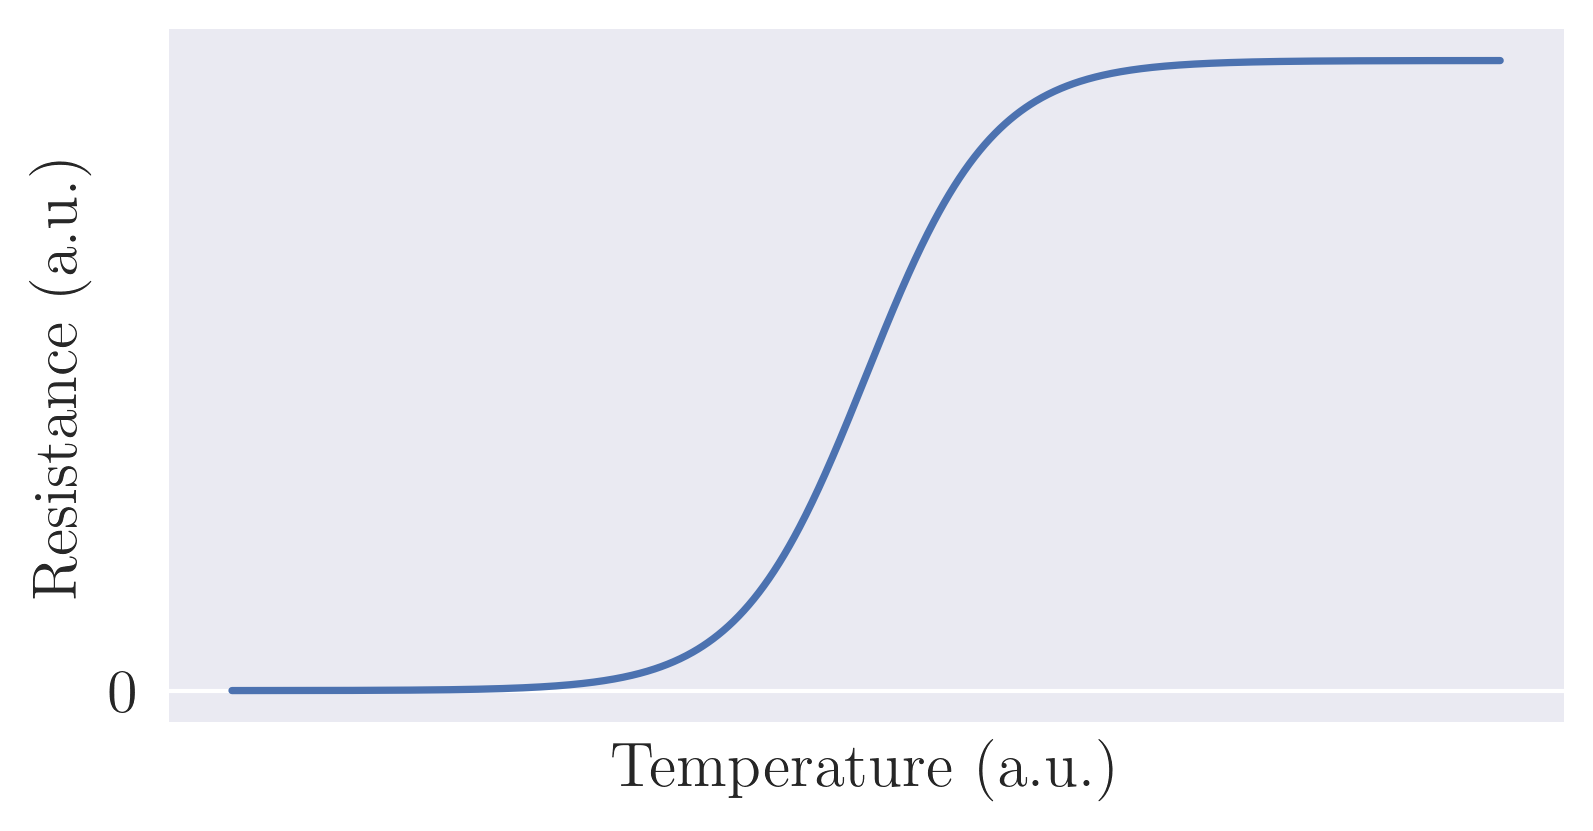

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-10*x))

x = np.linspace(-1,1,1000)

with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.plot(x, sigmoid(x))
    plt.xticks([])
    plt.yticks([0])
    plt.xlabel('Temperature (a.u.)')
    plt.ylabel('Resistance (a.u.)')
    plt.savefig('assets/TransitionEdge.png', bbox_inches='tight')
    plt.show()

### Example signals

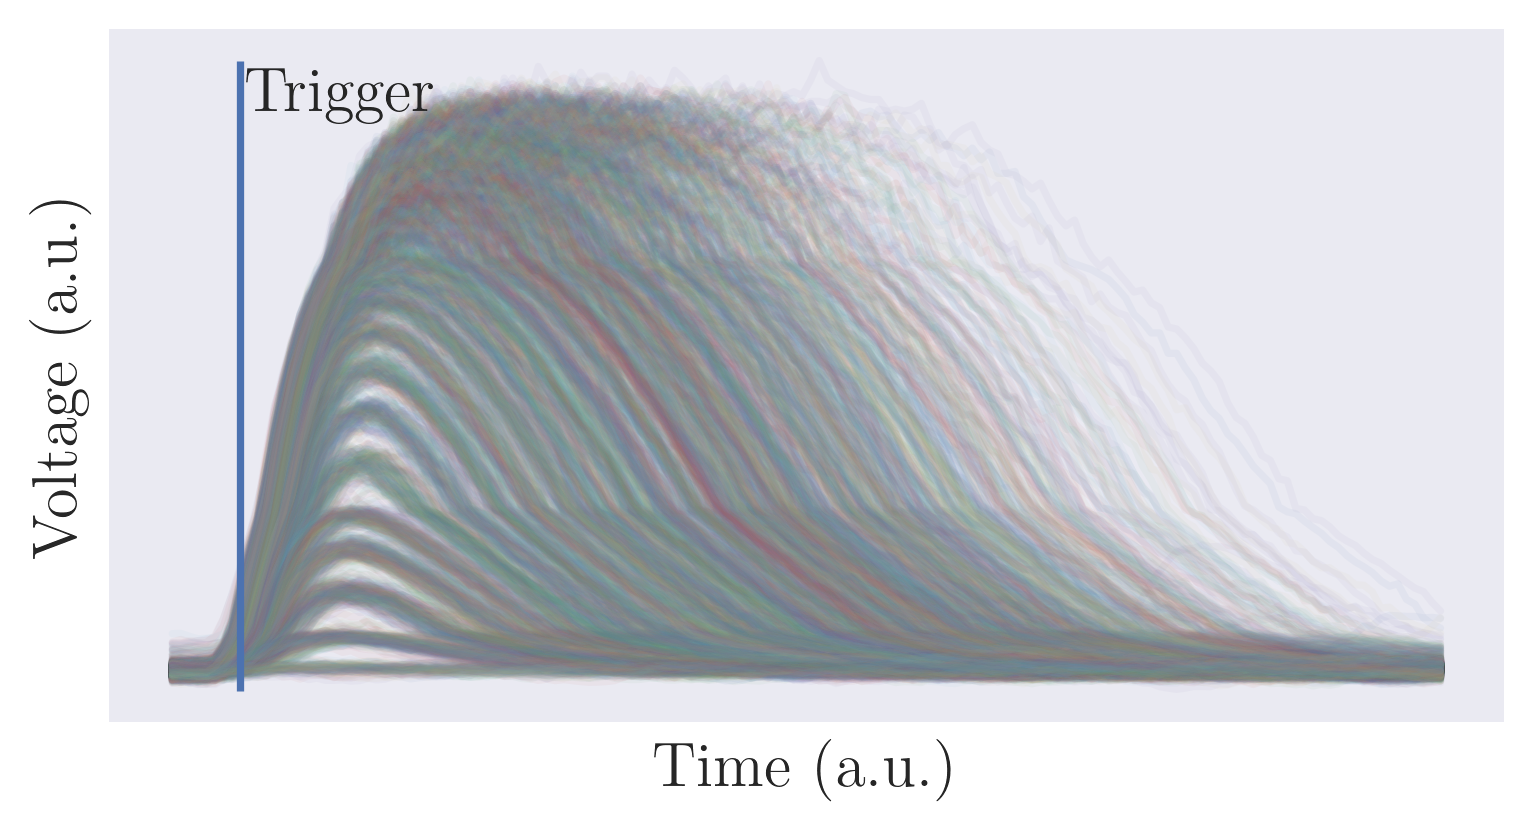

In [26]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.plot(data_train[::10].T,alpha=0.05)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.vlines(8,ymin=0,ymax=1)
    plt.text(x = 8.6, y = 0.92, s = 'Trigger')
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Traces_uniform.png', bbox_inches='tight')
    plt.show()

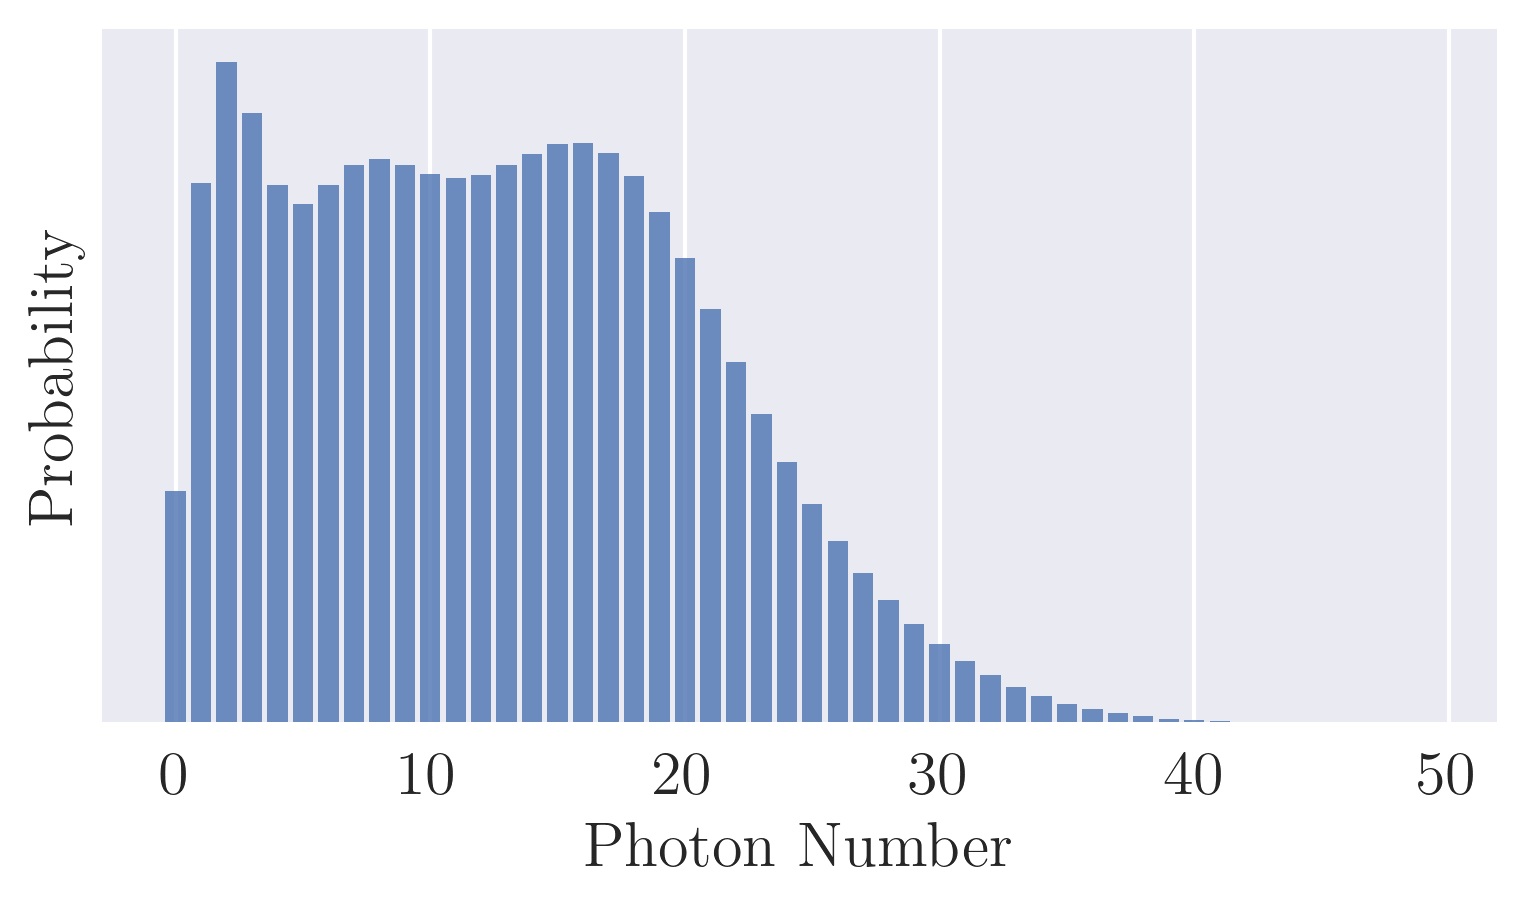

In [27]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.bar(np.arange(expected_prob.shape[0]),expected_prob,alpha=0.8)
    plt.ylabel("Probability")
    plt.xlabel("Photon Number")
    plt.yticks([])
    plt.savefig('assets/Distribution_Uniform.svg', bbox_inches='tight')
    plt.show()

In [28]:
data_train[::10].shape

(3055, 150)

### Problem Formulation

In [29]:
Y_MAX = max_value(data_poisson, filtering=True)
condition = (Y_MAX < 0.7).flatten()
Y_MAX_ex = Y_MAX[condition]
X_MAX_ex = data_poisson[condition]

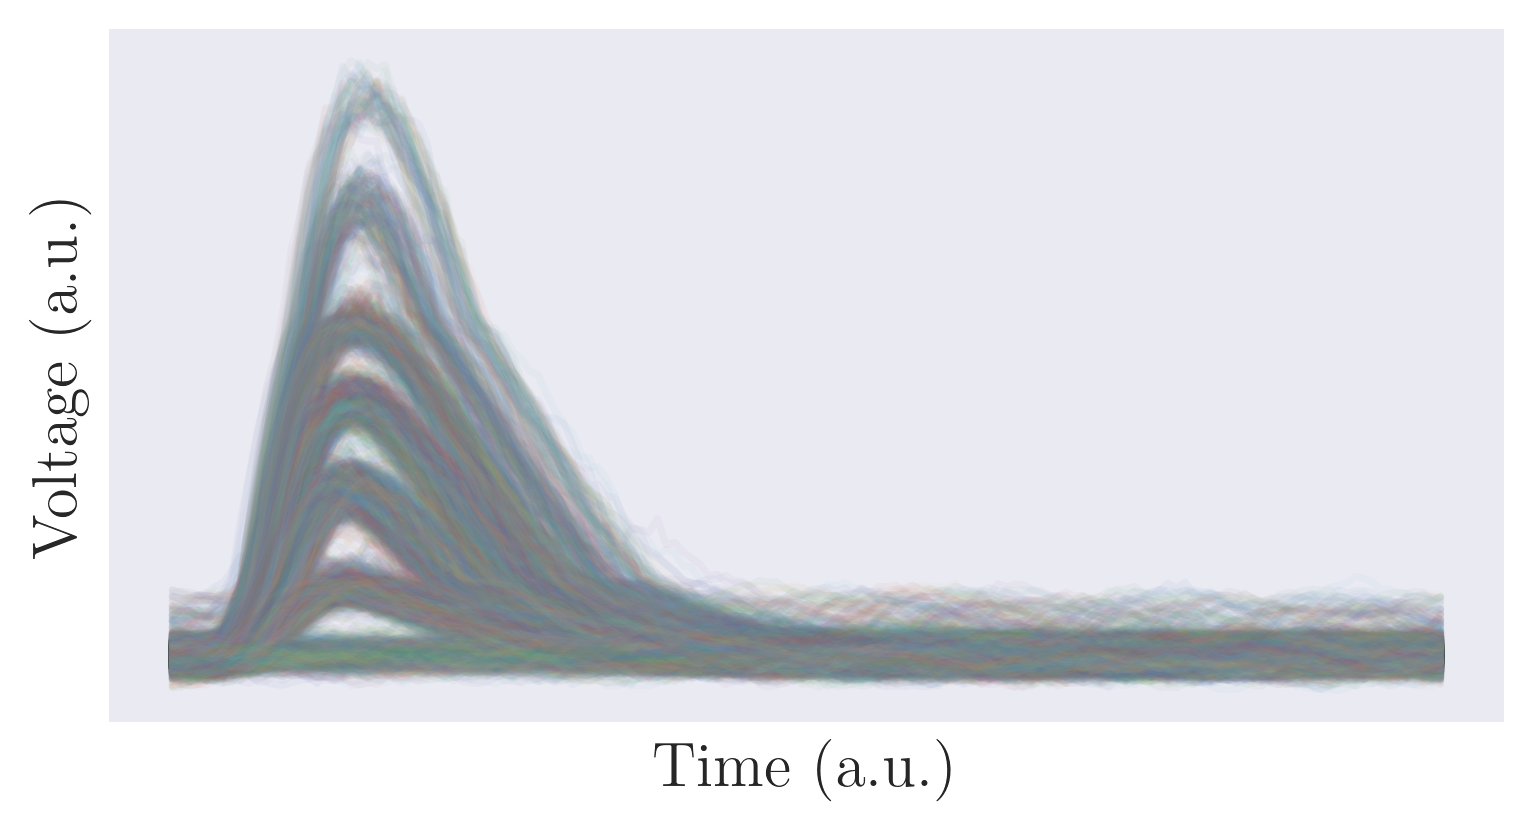

In [30]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.plot(X_MAX_ex[1::2].T,alpha=0.05)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Traces_poisson.png', bbox_inches='tight')
    plt.show()

# Historical Methods

### Maximum value

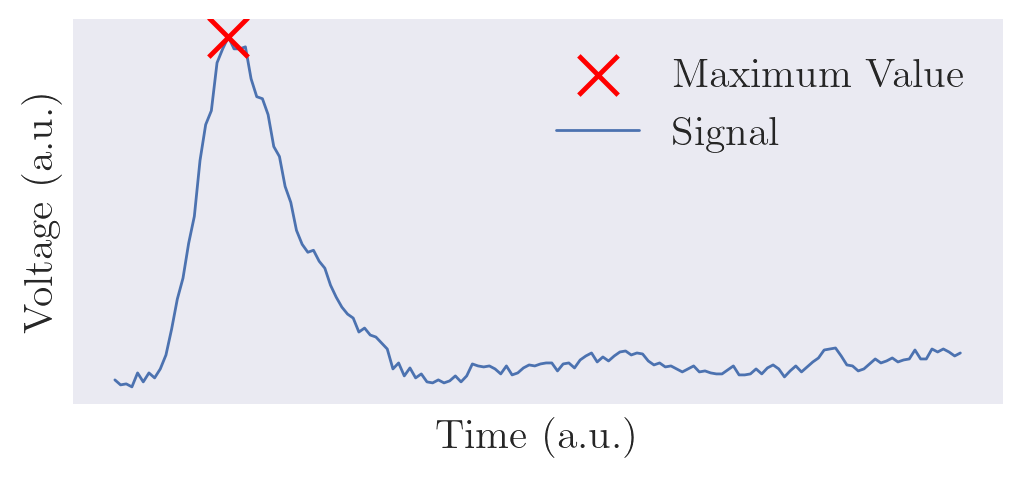

In [31]:
arg_max = np.argmax(data_test[IDX])

with plt.style.context(STYLE):
    plt.figure(figsize=(6,2.5), dpi=200)
    plt.scatter(arg_max, data_test[IDX,arg_max],s=200, marker="x", zorder=10, c="r", label='Maximum Value')
    plt.plot(data_test[IDX], linewidth=1, alpha=1, label='Signal')
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.legend()
    plt.savefig('assets/Trace_MAX.svg',format="svg")
    plt.show()

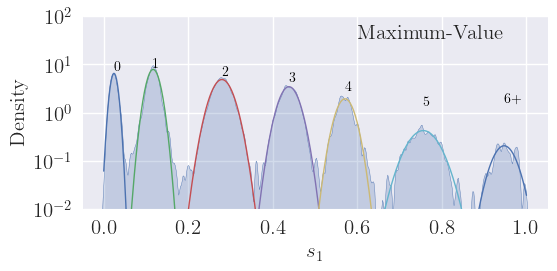

In [32]:
gm = gaussian_mixture(Y_MAX_ex,
                    X_MAX_ex,
                    means_init = None,
                    number_cluster = 7,
                    cluster_iter = 10,
                    info_sweep = 0,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 2.5,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.08,
                plot_gaussians = True,
                plot_scale = 'log',
                text = 'Maximum-Value',
                save_path = 'assets')

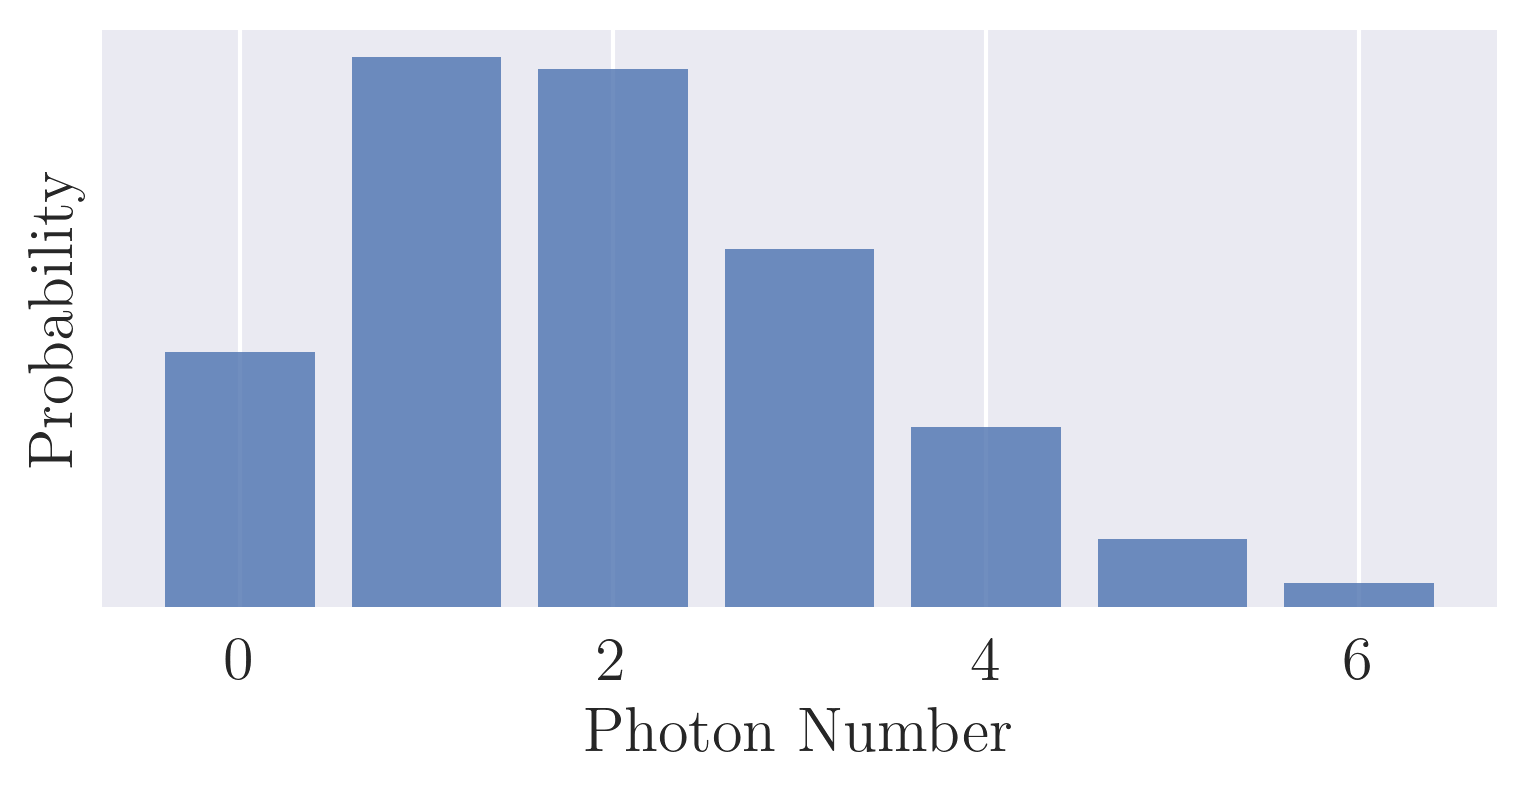

In [33]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,2.5), dpi=300)
    plt.bar(np.arange(7),np.bincount(gm.labels),alpha=0.8)
    plt.ylabel("Probability")
    plt.xlabel("Photon Number")
    plt.yticks([])
    plt.savefig('assets/Distribution_MAX.svg', bbox_inches='tight')
    plt.show()

### Area

In [34]:
X_AREA_ex  = area(data_poisson, filtering = True, plot_filter = False, threshold = 0.04)

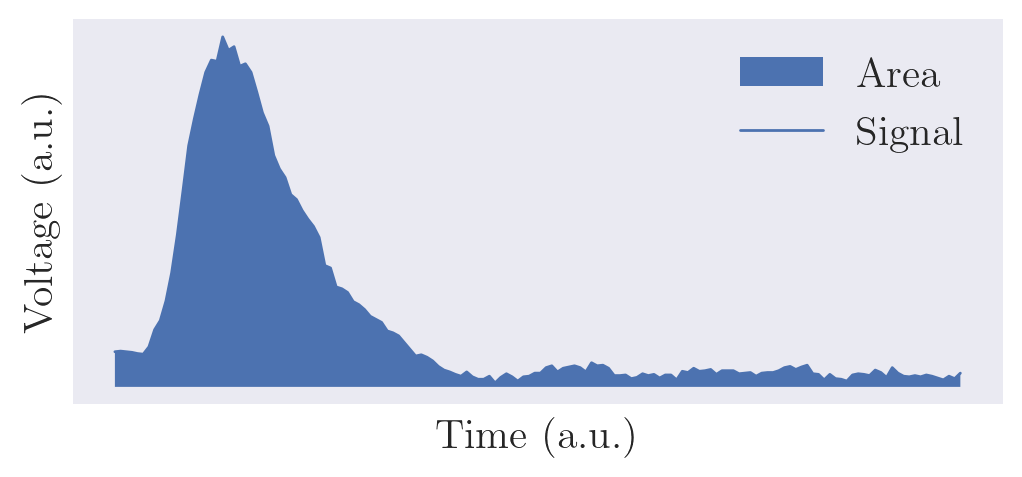

In [35]:
threshold = 0.04

with plt.style.context(STYLE):
    plt.figure(figsize=(6,2.5), dpi=200)

    plt.fill_between(TIME, data_poisson[IDX], threshold, label='Area')
    plt.plot(TIME, data_poisson[IDX], linewidth=1, alpha=1, label='Signal')
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.legend()
    plt.savefig('assets/Trace_AREA.svg',format="svg")
    plt.show()

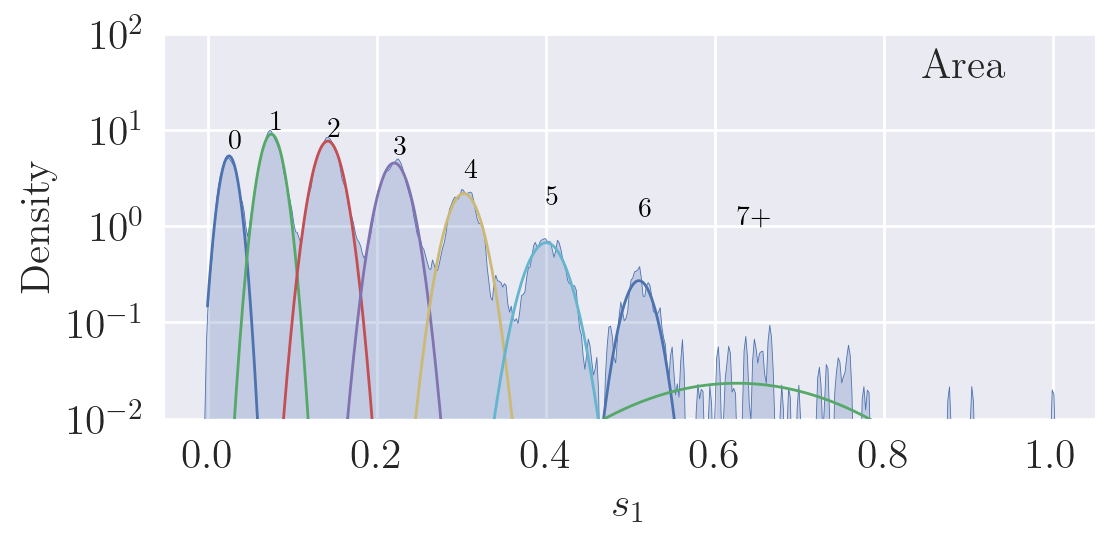

In [36]:
gm = gaussian_mixture(X_AREA_ex,
                    data_poisson,
                    means_init = None,
                    number_cluster = 8,
                    cluster_iter = 10,
                    info_sweep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 2.5,
                    dpi = 200,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = True,
                plot_scale = 'log',
                text = 'Area',
                save_path = 'assets')

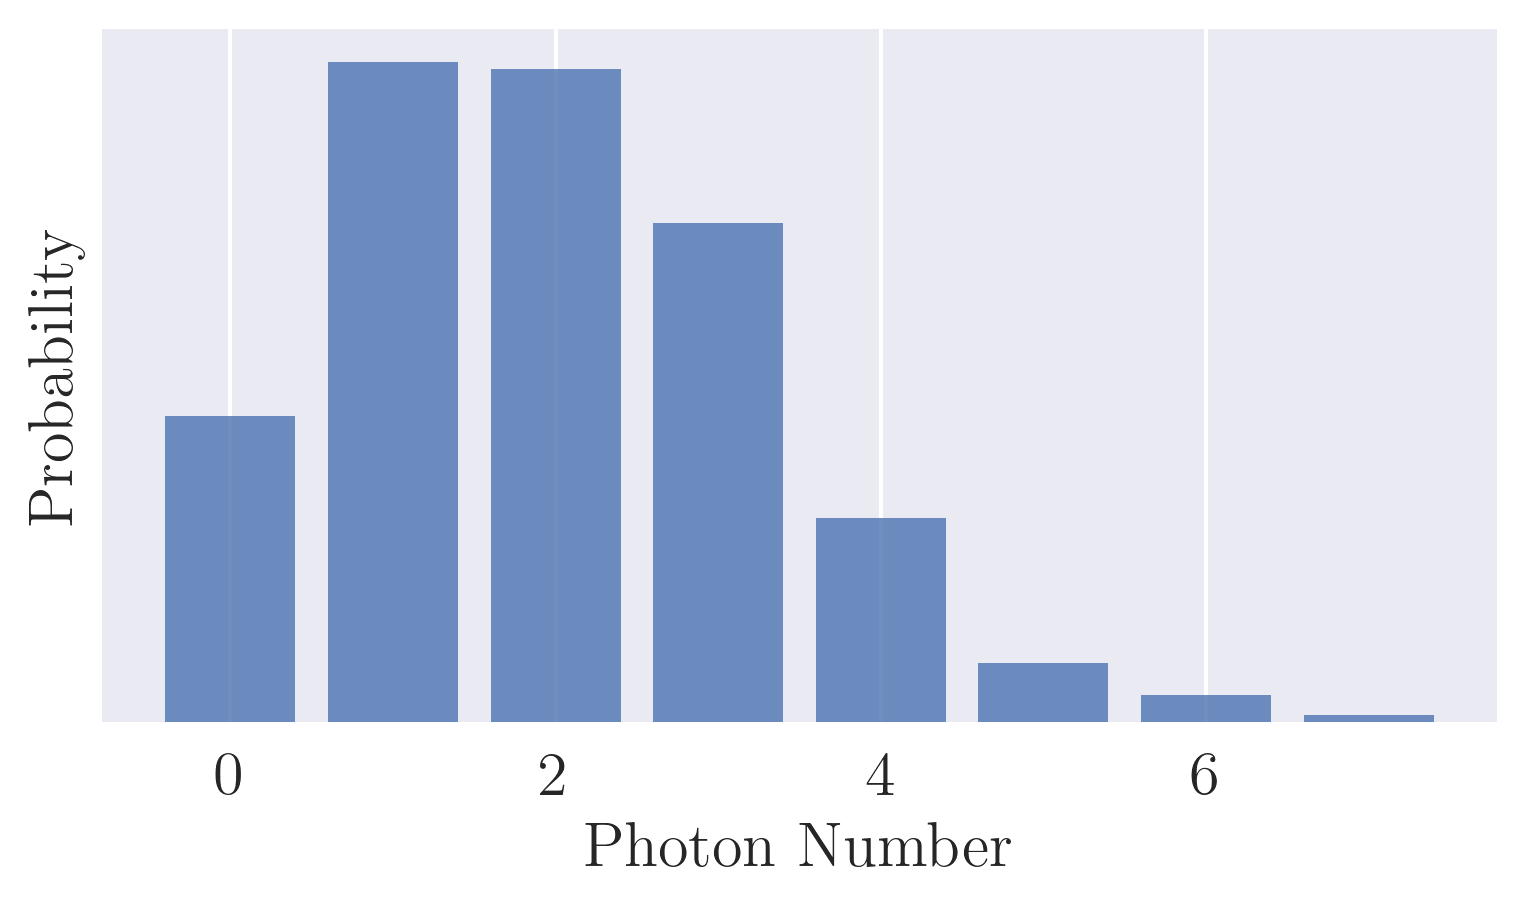

In [37]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.bar(np.arange(8),np.bincount(gm.labels),alpha=0.8)
    plt.ylabel("Probability")
    plt.xlabel("Photon Number")
    plt.yticks([])
    plt.savefig('assets/Distribution_AREA.svg', bbox_inches='tight')
    plt.show()

### PCA

In [38]:
pca = PCA(n_components=1)
X_PCA = pca.fit_transform(data_poisson)
first_component = pca.components_[0]

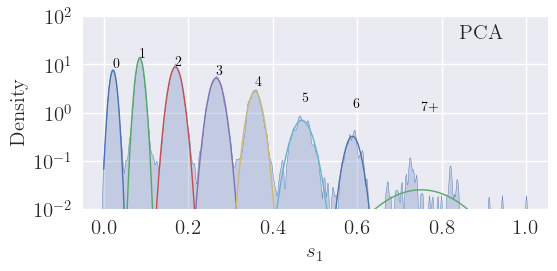

In [39]:
gm = gaussian_mixture(X_PCA,
                    data_poisson,
                    means_init = None,
                    number_cluster = 8,
                    cluster_iter = 10,
                    info_sweep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 2.5,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.1,
                plot_gaussians=True,
                plot_scale='log',
                text = 'PCA',
                save_path = 'assets')


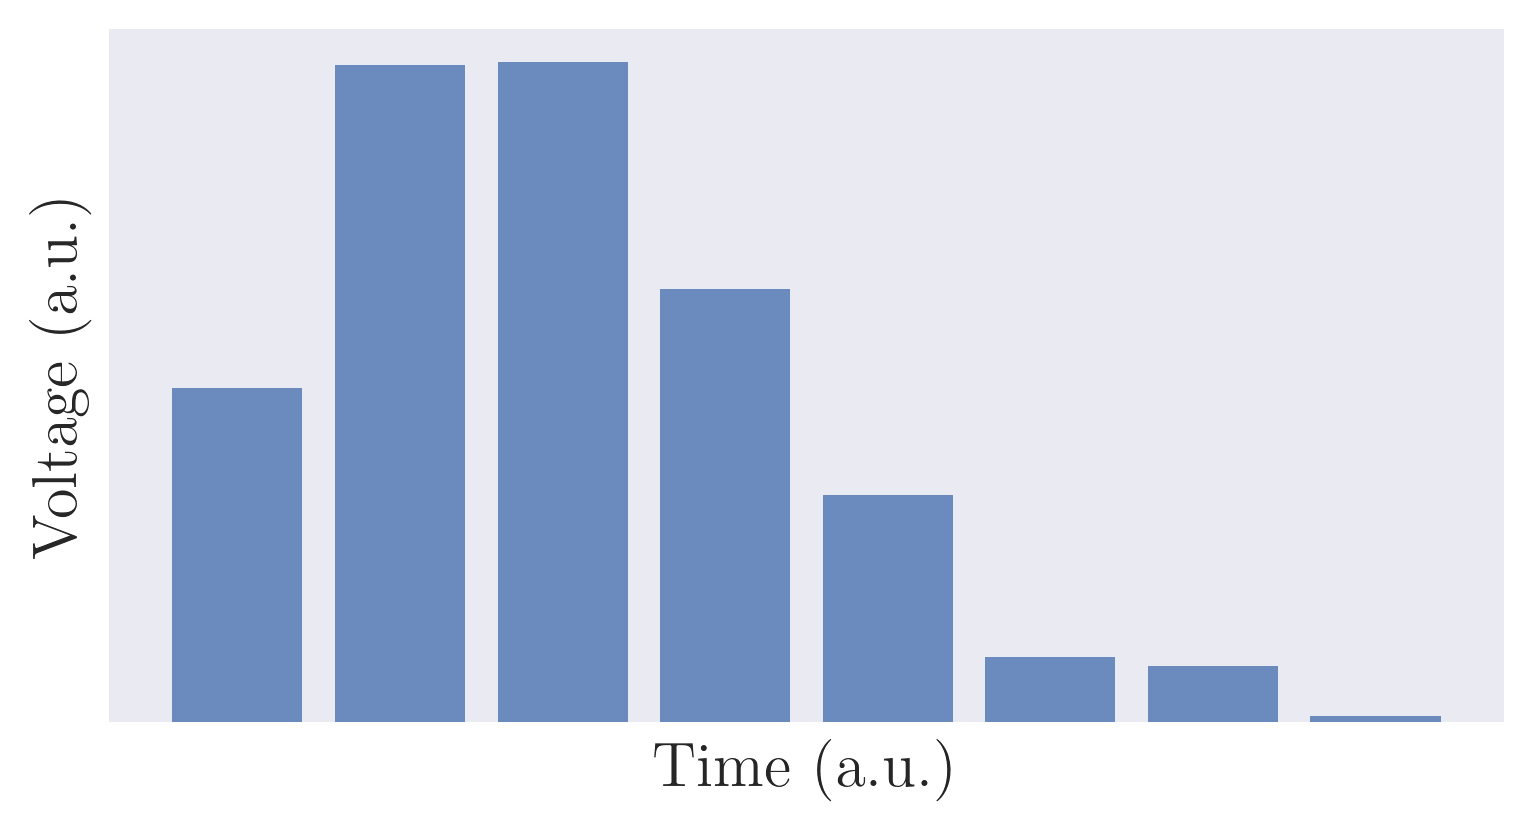

In [40]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.bar(np.arange(8),np.bincount(gm.labels),alpha=0.8)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Distribution_PCA.svg', bbox_inches='tight')
    plt.show()

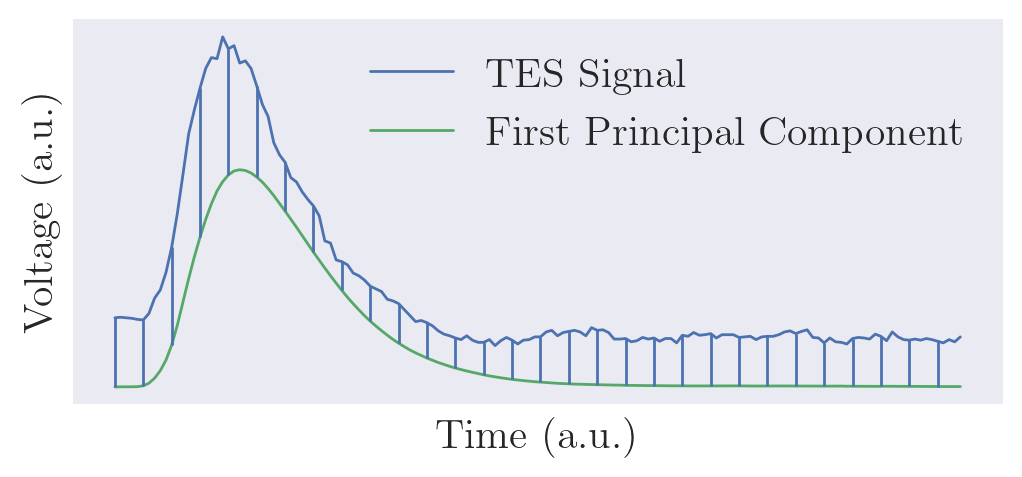

In [41]:
skip = 5

with plt.style.context(STYLE):
    plt.figure(figsize=(6,2.5), dpi=200)

    plt.plot(TIME, data_poisson[IDX], linewidth=1, alpha=1, label='TES Signal')
    plt.plot(TIME, first_component, linewidth=1, alpha=1, label='First Principal Component')
    plt.vlines(TIME[::skip], first_component[::skip], data_poisson[IDX][::skip], linewidth=1, alpha=1)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.legend()
    plt.savefig('assets/Trace_PCA.svg',format="svg")
    plt.show()